In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [67]:
infile=r'C:\Users\3056974\KTPAbdCF\calibration.csv'
infile=r'C:\Users\3056974\KTPAbdCF\sample.csv'

In [68]:
data = pd.read_csv(infile, skiprows = 9)
testdata = pd.read_csv(infile, skiprows = 9)

In [4]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum).1,Raw Data (Abs Spectrum).2,Raw Data (Abs Spectrum).3,Raw Data (Abs Spectrum).4,Raw Data (Abs Spectrum).5,Raw Data (Abs Spectrum).6,...,Raw Data (Abs Spectrum).281,Raw Data (Abs Spectrum).282,Raw Data (Abs Spectrum).283,Raw Data (Abs Spectrum).284,Raw Data (Abs Spectrum).285,Raw Data (Abs Spectrum).286,Raw Data (Abs Spectrum).287,Raw Data (Abs Spectrum).288,Raw Data (Abs Spectrum).289,Raw Data (Abs Spectrum).290
0,Well,Sample,Dilution,220.000,222.000,224.000,226.000,228.000,230.000,232.000,...,782.000,784.000,786.000,788.000,790.000,792.000,794.000,796.000,798.000,800.000
1,A1,S1,1,3.736,3.389,3.636,4.059,4.713,4.672,5.287,...,0.061,0.061,0.062,0.060,0.060,0.060,0.061,0.060,0.060,0.059
2,A3,S1,2,3.669,3.651,3.956,4.445,5.287,5.287,5.287,...,0.054,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052
3,A5,S1,4,3.232,4.083,4.167,3.785,5.164,5.028,5.112,...,0.053,0.054,0.052,0.051,0.051,0.051,0.052,0.050,0.050,0.050
4,A7,S1,8,3.131,3.328,3.814,4.026,4.893,5.287,4.825,...,0.051,0.050,0.050,0.049,0.049,0.050,0.050,0.049,0.051,0.048


In [5]:
# rename First Three columns 
data.rename(columns={ data.columns[0]: "Well", data.columns[1]: "Sample", data.columns[2]: "Dilution" },inplace=True)

In [6]:
#Find the unique values in the Dilution column
print(sorted(data['Dilution'].unique()))

['1', '128', '16', '2', '32', '4', '64', '8', 'Dilution']


In [7]:
data.head()

,Well,Sample,Dilution,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum).1,Raw Data (Abs Spectrum).2,Raw Data (Abs Spectrum).3,Raw Data (Abs Spectrum).4,Raw Data (Abs Spectrum).5,Raw Data (Abs Spectrum).6,...,Raw Data (Abs Spectrum).281,Raw Data (Abs Spectrum).282,Raw Data (Abs Spectrum).283,Raw Data (Abs Spectrum).284,Raw Data (Abs Spectrum).285,Raw Data (Abs Spectrum).286,Raw Data (Abs Spectrum).287,Raw Data (Abs Spectrum).288,Raw Data (Abs Spectrum).289,Raw Data (Abs Spectrum).290
0,Well,Sample,Dilution,220.000,222.000,224.000,226.000,228.000,230.000,232.000,...,782.000,784.000,786.000,788.000,790.000,792.000,794.000,796.000,798.000,800.000
1,A1,S1,1,3.736,3.389,3.636,4.059,4.713,4.672,5.287,...,0.061,0.061,0.062,0.060,0.060,0.060,0.061,0.060,0.060,0.059
2,A3,S1,2,3.669,3.651,3.956,4.445,5.287,5.287,5.287,...,0.054,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052
3,A5,S1,4,3.232,4.083,4.167,3.785,5.164,5.028,5.112,...,0.053,0.054,0.052,0.051,0.051,0.051,0.052,0.050,0.050,0.050
4,A7,S1,8,3.131,3.328,3.814,4.026,4.893,5.287,4.825,...,0.051,0.050,0.050,0.049,0.049,0.050,0.050,0.049,0.051,0.048


In [8]:
# data.insert(3, 'constant', 50)

In [9]:
data.head()

,Well,Sample,Dilution,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum).1,Raw Data (Abs Spectrum).2,Raw Data (Abs Spectrum).3,Raw Data (Abs Spectrum).4,Raw Data (Abs Spectrum).5,Raw Data (Abs Spectrum).6,...,Raw Data (Abs Spectrum).281,Raw Data (Abs Spectrum).282,Raw Data (Abs Spectrum).283,Raw Data (Abs Spectrum).284,Raw Data (Abs Spectrum).285,Raw Data (Abs Spectrum).286,Raw Data (Abs Spectrum).287,Raw Data (Abs Spectrum).288,Raw Data (Abs Spectrum).289,Raw Data (Abs Spectrum).290
0,Well,Sample,Dilution,220.000,222.000,224.000,226.000,228.000,230.000,232.000,...,782.000,784.000,786.000,788.000,790.000,792.000,794.000,796.000,798.000,800.000
1,A1,S1,1,3.736,3.389,3.636,4.059,4.713,4.672,5.287,...,0.061,0.061,0.062,0.060,0.060,0.060,0.061,0.060,0.060,0.059
2,A3,S1,2,3.669,3.651,3.956,4.445,5.287,5.287,5.287,...,0.054,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052
3,A5,S1,4,3.232,4.083,4.167,3.785,5.164,5.028,5.112,...,0.053,0.054,0.052,0.051,0.051,0.051,0.052,0.050,0.050,0.050
4,A7,S1,8,3.131,3.328,3.814,4.026,4.893,5.287,4.825,...,0.051,0.050,0.050,0.049,0.049,0.050,0.050,0.049,0.051,0.048


In [10]:
# data['c']= data['constant']/data['Dilution']

In [11]:
# data['Concentration']= (50)/data['Dilution']

In [12]:
# data['Concentration']=data['Dilution'].apply(lambda x: x//50)

In [13]:
# Filter the rows where Dilution is 1 for S1 sample
d1=data.loc[(data['Dilution'] == '1') & (data['Sample'] == 'S1')]

In [14]:
# Filter the rows where Dilution is 2 for S1 sample
d2=data.loc[(data['Dilution'] == '2') & (data['Sample'] == 'S1')]

In [15]:
# Filter the rows where Dilution is 4 for S1 sample
d3=data.loc[(data['Dilution'] == '4') & (data['Sample'] == 'S1')]

In [16]:
# Filter the rows where Dilution is 8 for S1 sample
d4=data.loc[(data['Dilution'] == '8') & (data['Sample'] == 'S1')]

In [17]:
# Filter the rows where Dilution is 16 for S1 sample
d5=data.loc[(data['Dilution'] == '16') & (data['Sample'] == 'S1')]

In [18]:
# Filter the rows where Dilution is 32 for S1 sample
d6=data.loc[(data['Dilution'] == '32') & (data['Sample'] == 'S1')]

In [19]:
# Filter the rows where Dilution is 64 for S1 sample
d7=data.loc[(data['Dilution'] == '64') & (data['Sample'] == 'S1')]

In [20]:
# Filter the rows where Dilution is 128 for S1 sample
d8=data.loc[(data['Dilution'] == '128') & (data['Sample'] == 'S1')]

In [21]:
# Filter the rows where Dilution for Blank sample
Blank=data.loc[(data['Sample'] == 'Blank')]

In [22]:
# interval as x-axis
x_axis=data.iloc[0,3:].values.copy()

In [23]:
d1.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)

C:\Users\3056974\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
# fig, axs = plt.subplots(sharex=True, sharey=True, figsize=(8,6))
# fig, axs=plt.subplots(figsize=(8,6))
# fig.suptitle('Plot of each Dilution value ')
# axs.plot(x_axis, d1.iloc[0].values )
# # axs.plot(x_axis, d1.iloc[1].values, 'o')
# axs.plot(x_axis, d1.iloc[1].values, color='green')
# axs.plot(x_axis, d1.iloc[2].values, color='red')
# plt.xlabel("wavelength(nm)")
# plt.ylabel("Absorbance(au)")
# plt.show()

In [25]:
d2.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)
d3.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)
d4.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)
d5.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)
d6.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)
d7.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)
d8.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)

In [26]:
Blank.drop(['Well', 'Sample','Dilution'], axis=1, inplace=True)

In [27]:
Blank

,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum).1,Raw Data (Abs Spectrum).2,Raw Data (Abs Spectrum).3,Raw Data (Abs Spectrum).4,Raw Data (Abs Spectrum).5,Raw Data (Abs Spectrum).6,Raw Data (Abs Spectrum).7,Raw Data (Abs Spectrum).8,Raw Data (Abs Spectrum).9,...,Raw Data (Abs Spectrum).281,Raw Data (Abs Spectrum).282,Raw Data (Abs Spectrum).283,Raw Data (Abs Spectrum).284,Raw Data (Abs Spectrum).285,Raw Data (Abs Spectrum).286,Raw Data (Abs Spectrum).287,Raw Data (Abs Spectrum).288,Raw Data (Abs Spectrum).289,Raw Data (Abs Spectrum).290
25,3.977,3.618,4.070,3.960,4.618,5.287,5.287,5.287,4.913,5.287,...,0.051,0.050,0.049,0.050,0.050,0.050,0.049,0.050,0.050,0.049
26,3.393,3.726,4.098,3.924,4.907,4.660,5.287,5.287,5.263,5.287,...,0.052,0.052,0.052,0.050,0.050,0.051,0.051,0.051,0.052,0.050
27,3.439,3.322,4.038,5.287,5.287,4.939,5.287,5.287,5.287,5.287,...,0.049,0.048,0.048,0.047,0.047,0.047,0.048,0.048,0.047,0.047


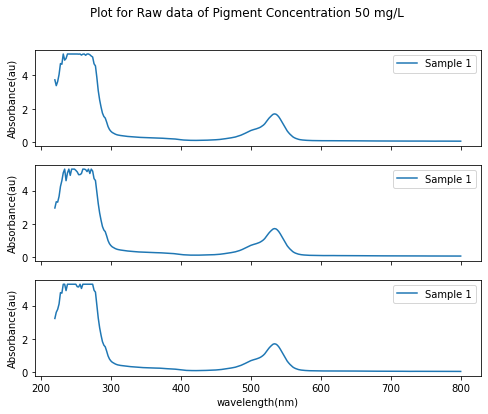

In [34]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 50 mg/L  ')
axs[0].plot(x_axis, d1.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d1.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d1.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

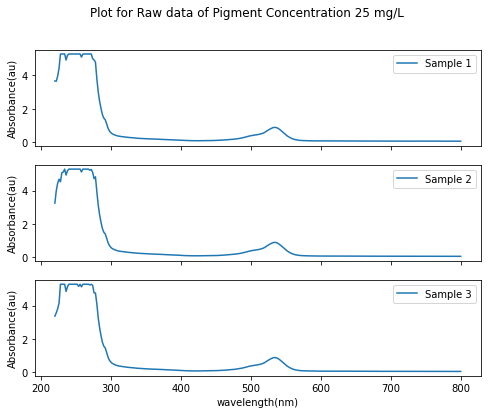

In [37]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 25 mg/L  ')
axs[0].plot(x_axis, d2.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d2.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d2.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

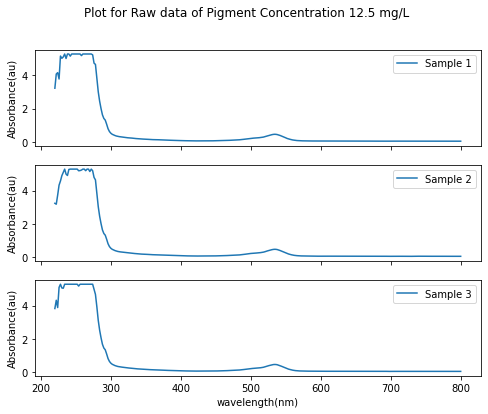

In [38]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 12.5 mg/L  ')
axs[0].plot(x_axis, d3.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d3.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d3.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

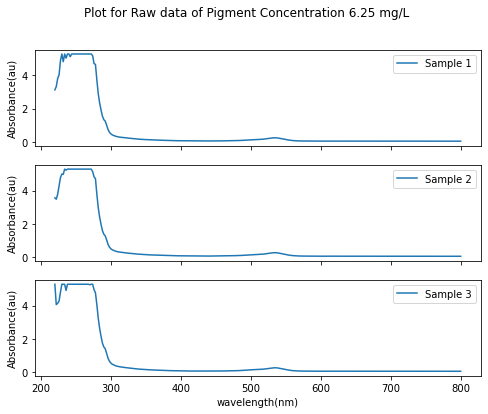

In [39]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 6.25 mg/L  ')
axs[0].plot(x_axis, d4.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d4.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d4.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

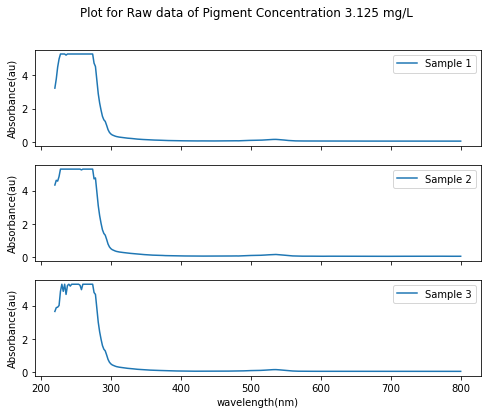

In [40]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 3.125 mg/L  ')
axs[0].plot(x_axis, d5.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d5.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d5.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

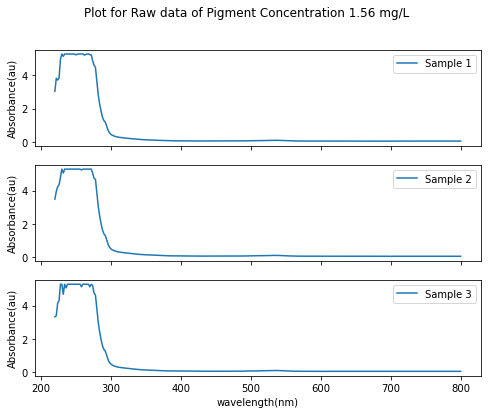

In [41]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 1.56 mg/L  ')
axs[0].plot(x_axis, d6.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d6.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d6.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

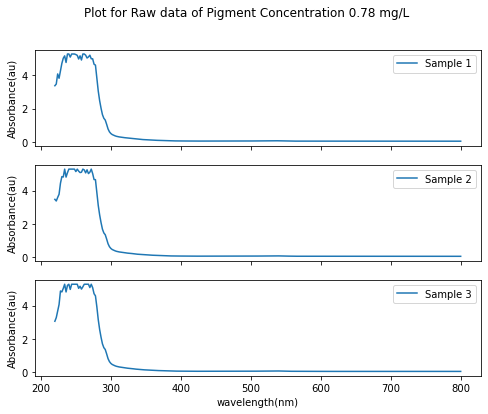

In [42]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 0.78 mg/L  ')
axs[0].plot(x_axis, d7.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d7.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d7.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

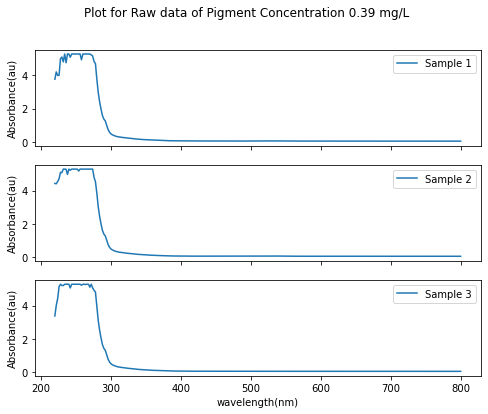

In [43]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration 0.39 mg/L  ')
axs[0].plot(x_axis, d8.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, d8.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, d8.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

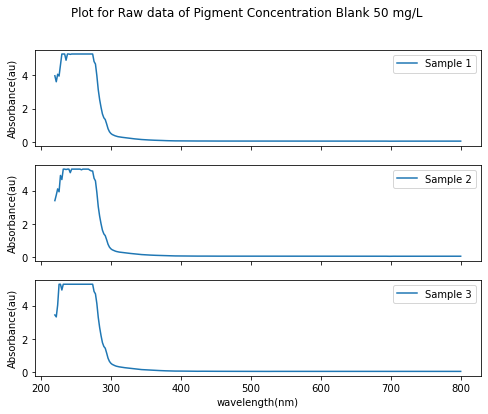

In [44]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Plot for Raw data of Pigment Concentration Blank 50 mg/L  ')
axs[0].plot(x_axis, Blank.iloc[0].values,label='Sample 1')
axs[1].plot(x_axis, Blank.iloc[1].values, label='Sample 2')
axs[2].plot(x_axis, Blank.iloc[2].values, label='Sample 3')
axs[2].set_xlabel("wavelength(nm)")
axs[0].set_ylabel("Absorbance(au)")
axs[1].set_ylabel("Absorbance(au)")
axs[2].set_ylabel("Absorbance(au)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

In [45]:
sum_d1=d1.sum(axis=0).values
sum_d2=d2.sum(axis=0).values
sum_d3=d3.sum(axis=0).values
sum_d4=d4.sum(axis=0).values
sum_d5=d5.sum(axis=0).values
sum_d6=d6.sum(axis=0).values
sum_d7=d7.sum(axis=0).values
sum_d8=d8.sum(axis=0).values


In [46]:
sum_Blank= Blank.sum(axis=0).values

In [59]:
Corrected_d1=(sum_Blank-sum_d1)/3
Corrected_d2=(sum_Blank-sum_d2)/3
Corrected_d3=(sum_Blank-sum_d3)/3
Corrected_d4=(sum_Blank-sum_d4)/3
Corrected_d5=(sum_Blank-sum_d5)/3
Corrected_d6=(sum_Blank-sum_d6)/3
Corrected_d7=(sum_Blank-sum_d7)/3
Corrected_d8=(sum_Blank-sum_d8)/3

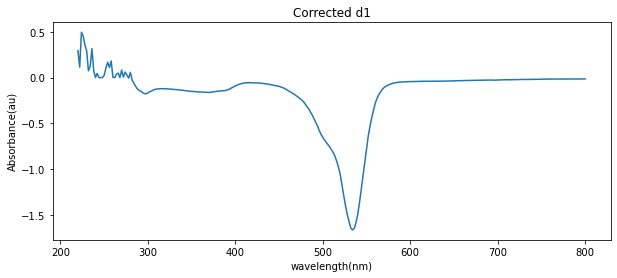

In [58]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d1) 
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 50 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

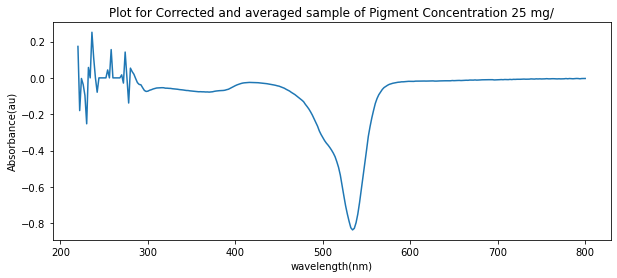

In [60]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d2)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 25 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

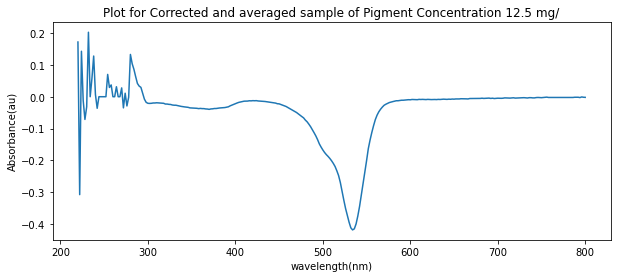

In [61]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d3)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 12.5 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

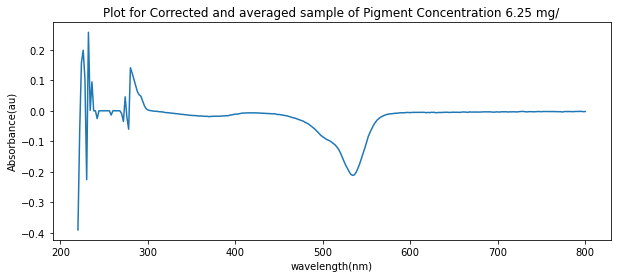

In [62]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d4)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 6.25 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

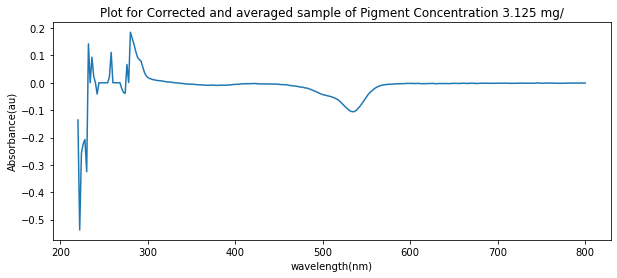

In [63]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d5)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 3.125 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

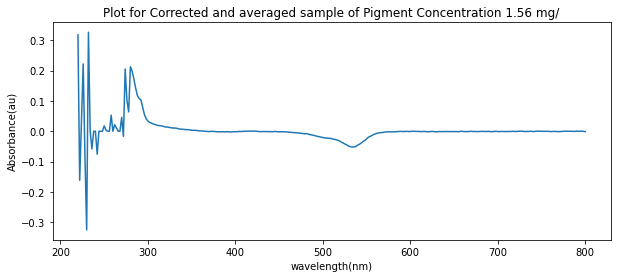

In [64]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d6)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 1.56 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

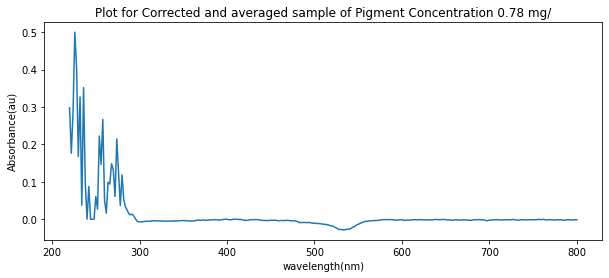

In [65]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d7)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 0.78 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

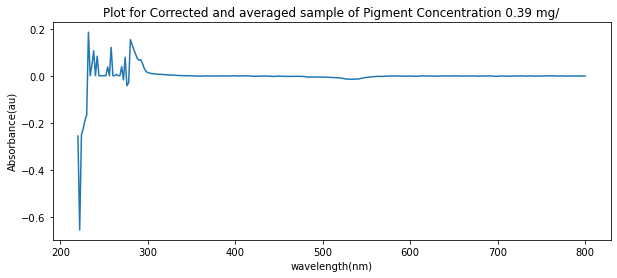

In [66]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x_axis, Corrected_d8)
ax.set_title('Plot for Corrected and averaged sample of Pigment Concentration 0.39 mg/')
plt.xlabel("wavelength(nm)")
plt.ylabel("Absorbance(au)")
plt.show()

In [ ]:
#Task 2

In [ ]:
train = data[:(int((len(data))))]
test = data[(int((len(testdata)))):]

In [ ]:
# I dont have time to implement the model. My idea was to have the corrected callibration data as the train data and the sample data (after adding X1s three repeatations and then subtracting the three blanks ). these would be my train and test data. then I would implement the multivariable linear regression

In [69]:
regr = linear_model.LinearRegression()
train_x = np.array(train[["x"]])
train_y = np.array(train[["y"]])
regr.fit(data,test)

NameError: name 'train' is not defined